# **Investment Strategies for Stocks and Cryptocurruncies** 


### Team 7

* Madhusree Chowdhury
* Rachel Kallely
* Chinomnso Eleje
* Divya Myneni 

Final Project Video: https://drive.google.com/file/d/1dU7BMPEV9Xx_BtI7iZnsgDwydPez06gU/view?usp=sharing

### **Problem Statement**
The objective of this project is to use Modern Portfolio Theory (MPT) to create a portfolio of stocks that maximizes profit return, while accouting for risk and volatility. This project has the following components: 
* Exploratory Data Analysis that explores the risk and volatility of our stocks and cryptocurrencies
* Non Linear Optimzation Model for Portfolio Allocation
* Monte Carle Simulation to compute the probability with which our selected portfolio will lose money
* Analysis on how our portfolio performed

![picture](https://www.ft.com/__origami/service/image/v2/images/raw/https%3A%2F%2Fd1e00ek4ebabms.cloudfront.net%2Fproduction%2Fe2e203dc-5547-449c-b485-3ea5f00c55af.jpg?fit=scale-down&source=next&width=700)



# Background
##### A portfolio is a collection of assets.  In a stock portfolio, the investor chooses 

*   the stocks
*   dollar value of each stock

At the end of the period, performance can be measured by the total value of the portfolio. The value of the stocks may change over an investment period, but the goal is to see an overall increase in the portfolio value, and a profitable return. 
#####-
#####The performance of individual stocks can be measured in two ways: return and risk.  

*   **Return:** percentage growth in the value of the stock.
*   **Risk:** is the variability associated with the returns on the stock.

When we create a portfolio of stocks, our goals are usually to maximize the mean return and to minimize the risk. Both goals cannot be met simultaneously, but we use optimization to explore the trade-offs involved.

# 1 - Data Preparation

### **Chosing Our Stocks and Cryptocurrencies**

***Market Cap Constraint***

##### We had some asset constraints that we had to work with. For both stocks and cryptocurrencies, we had a range within which the market cap needed to fall.

**Stocks:** 2 billion - 10 billion dollars
##### **Cryptocurrencies:** 1 billion - 20 billion dollars

Based on these constraints, our team chose 4 stocks and 4 cryptocurrencies. We explored a variety of stocks and cryptocurrencies that fit the constraints and ultimately focused on industry type and market value. Since we hadn't done any data anlysis yet, we focused primarily on chosing a diverse set of stocks. These were our chosen stocks and crypto currencies.

#####-

**Stocks**
#####Vail Resorts, Inc. (MTN)
#####Webster Financial Corporation (WBS) 
#####AMC entertainment  (AMC)
#####American Airlines Group Inc (AAL)

**Cryptocurrencies**
#####Direxion Daily Semiconductor Bull 3X Shares (SOXL)
#####Dash (DASH-USD)
#####Litecoin (LTC-USD)
#####Ethereum (ETC-USD)


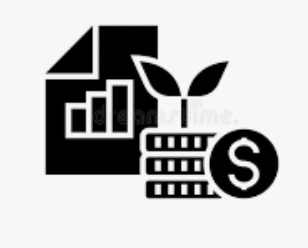

### **Extracting and Cleaning Our Data**
##### The information on which stock performance is evaluated is a series of historical returns, typically compiled on a monthly basis. This history provides an empirical distribution of a stock’s return performance.

#####-



#####In the following section, we scraped historical  data on the chosen stocks, from yahoo finance. We then put the data into a dateframe and calculated the percent change. Finally we removed all rows with missing values.



In [ ]:
# some useful modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     |████████████████████████████████| 81 kB 3.3 MB/s 
     |████████████████████████████████| 83 kB 1.4 MB/s 
     |████████████████████████████████| 127 kB 39.6 MB/s 
     |████████████████████████████████| 112 kB 9.9 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=4a6879f4962c418de772acee9f1899cc63d1b178fa4b674d6dc3df7083267a45
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=56212ebbaf32efe7286732bb81426a5033afd79907e79ff07495110e7279b4fc
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=81afaefafe38eac2e48772f4b1b30e328837d0879f6d52a5ea1253a483a1f402
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ceb

In [ ]:
# Assign the ticker list that we want to scrap
tickers_list = ['MTN','WBS','AMC','AAL', 'SOXL','DASH-USD','LTC-USD','ETC-USD']
               
# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in tickers_list}

In [ ]:
dow_prices

{'AAL':                  open       high        low      close   adjclose    volume  \
 2017-01-03  47.279999  47.340000  46.139999  46.299999  44.741226   6737800   
 2017-01-04  46.630001  47.439999  46.349998  46.700001  45.127762   5859600   
 2017-01-05  46.520000  46.930000  45.610001  45.889999  44.345032   6825300   
 2017-01-06  45.849998  46.720001  45.470001  46.209999  44.654259   7260200   
 2017-01-09  46.009998  47.340000  45.779999  47.080002  45.494965   4739100   
 ...               ...        ...        ...        ...        ...       ...   
 2021-12-23  18.590000  18.719999  18.150000  18.260000  18.260000  32321000   
 2021-12-27  17.660000  18.240000  17.549999  18.170000  18.170000  28059300   
 2021-12-28  18.030001  18.639999  17.920000  18.540001  18.540001  28263600   
 2021-12-29  18.400000  18.430000  17.990000  18.049999  18.049999  22627000   
 2021-12-30  17.980000  18.379999  17.959999  18.070000  18.070000  28158200   
 
            ticker  
 2017-01-0

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the MTN (one sample)
prep_data = pd.DataFrame(dow_prices['MTN']['adjclose']).rename(columns = {"adjclose":"MTN"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,MTN,WBS,AMC,AAL,SOXL,DASH-USD,LTC-USD,ETC-USD
2017-01-03,145.452789,46.098457,27.085869,44.741226,3.745236,NaN,4.626200,NaN
2017-01-04,146.609314,47.105053,26.657173,45.127762,3.779289,NaN,4.837850,NaN
2017-01-05,147.856216,46.294655,26.501278,44.345032,3.675164,NaN,4.292720,NaN
2017-01-06,148.606125,46.397022,26.345390,44.654259,3.763572,NaN,3.861260,NaN
2017-01-09,146.130447,45.279537,25.955666,45.494965,3.884725,NaN,4.301960,NaN
...,...,...,...,...,...,...,...,...
2021-12-23,328.908752,54.911530,28.520000,18.260000,67.397903,146.012527,163.449493,37.531700
2021-12-27,328.084839,55.825397,28.700001,18.170000,72.976898,150.252655,155.881226,37.642139
2021-12-28,327.141846,55.795597,27.719999,18.540001,70.507339,135.103470,145.886871,35.015480
2021-12-29,329.176727,56.331997,27.950001,18.049999,70.987259,133.330338,145.512619,34.123405


In [ ]:
prep_data.shape #the shape of the data

(1258, 8)

In [ ]:
prep_data.isna().sum()

MTN           0
WBS           0
AMC           0
AAL           0
SOXL          0
DASH-USD    216
LTC-USD       0
ETC-USD     216
dtype: int64

In [ ]:
prep_data.dropna(inplace = True) #to drop the missing values
prep_data.shape

(1042, 8)

In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# drop the na records
return_data.dropna(inplace=True)
return_data

,MTN,WBS,AMC,AAL,SOXL,DASH-USD,LTC-USD,ETC-USD
2017-11-10,-0.002322,0.003069,-0.035088,0.003284,0.018990,0.010929,-0.077946,0.027700
2017-11-13,-0.011679,0.010518,0.059091,-0.001746,0.008141,0.296755,0.036051,0.102910
2017-11-14,0.001744,0.000000,0.047210,0.001530,-0.002776,0.000393,0.020899,0.109283
2017-11-15,-0.012014,0.000946,0.028688,0.030125,-0.026509,-0.007316,0.018252,-0.017799
2017-11-16,0.007049,-0.003214,-0.007968,0.010384,0.045038,-0.014681,0.113384,-0.038027
...,...,...,...,...,...,...,...,...
2021-12-23,0.005996,0.011158,-0.005579,0.000000,0.031049,0.081052,0.051342,0.050429
2021-12-27,-0.002505,0.016643,0.006311,-0.004929,0.082777,0.029039,-0.046303,0.002943
2021-12-28,-0.002874,-0.000534,-0.034146,0.020363,-0.033840,-0.100825,-0.064115,-0.069780
2021-12-29,0.006220,0.009614,0.008297,-0.026429,0.006807,-0.013124,-0.002565,-0.025477


In [ ]:
return_data.shape

(1041, 8)

# Exploratory Data Analysis

###**Visualize Time Series**
We used time series plots to explore trends in each stock, and investigate volatility. Overall, the plots seem to show significant levels of volatility in almost all of the stocks, especially in AMC, AAL, and WBS. However the mean seems to go up slightly or stay the same throughout for most stocks, which indicates normal risk.

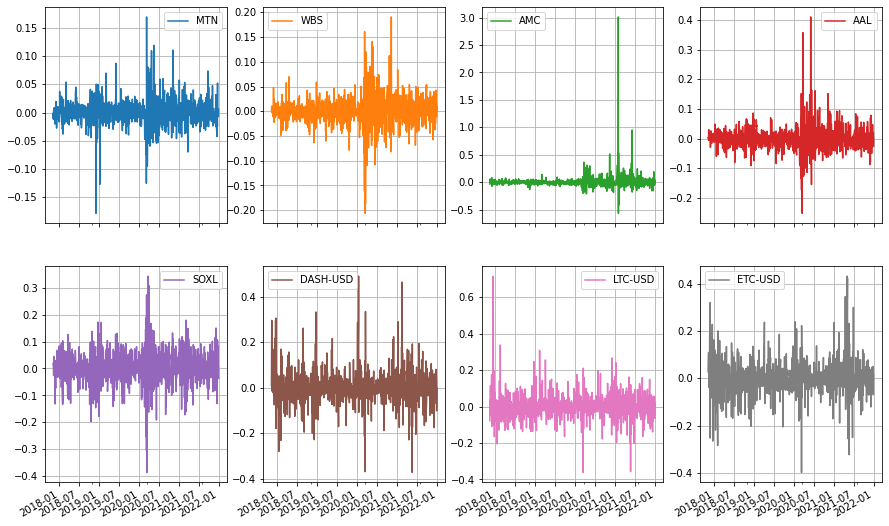

In [ ]:
#Initial time series is a little concerning as there seems to be a lot of variance
#We will analyze all time series plot together in the next section to get a better understanding of the behavior of the mean
return_data.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
plt.show()

###**Plotting Together**

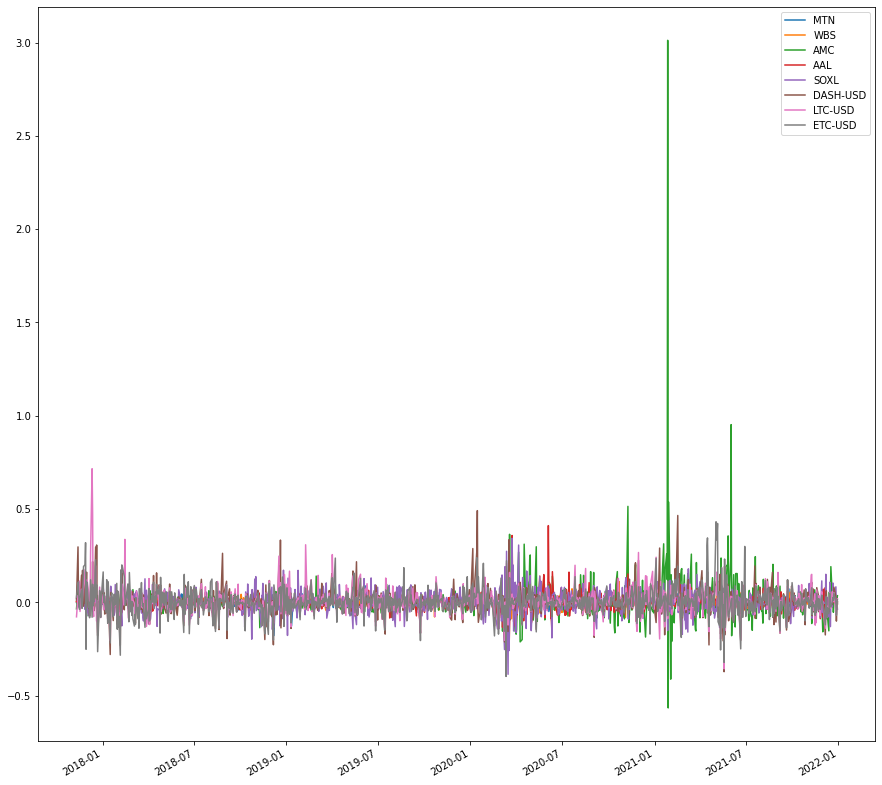

In [ ]:
# Looks cleaner than expected, most volatility with AMC. However this also seems to be a single event. Overall moderate volatility for all stocks
return_data.plot(layout=(3,4),
         figsize=(15,15))

plt.show()

#2- Non Linear Portfolio Optimization

In this secion we created an optimization model to select optimal portfolio allocations for each stock.

In [ ]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

In [ ]:
# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # We are using the IPOPT Solver.
except:
    pass

     |████████████████████████████████| 9.6 MB 5.6 MB/s 
     |████████████████████████████████| 49 kB 2.7 MB/s 


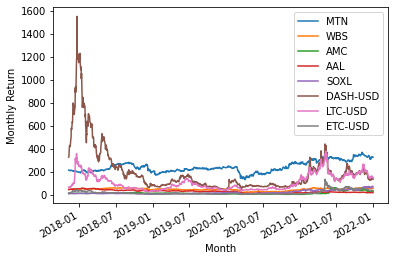

In [ ]:
#plot of monthly return
prep_data.plot()
plt.xlabel('Month')
plt.ylabel('Monthly Return')
plt.show() 

In [ ]:
# Made a dataframe for the mean of each column in df, and the sd for each column in df
# Mean can be representative of return while std dev is representative of risk. High return is not necessarily valuable with high risk
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

          Avg_Return
MTN         0.000665
WBS         0.000630
AMC         0.005316
AAL        -0.000121
SOXL        0.003748
DASH-USD    0.001734
LTC-USD     0.003070
ETC-USD     0.003484
          Std_Dev_Return
MTN             0.022557
WBS             0.029266
AMC             0.119639
AAL             0.039181
SOXL            0.061092
DASH-USD        0.072503
LTC-USD         0.068596
ETC-USD         0.072724


###**Covariance and Correlation**
##### In Modern Portfolio Theory, covariance is a way that we can balance our portfolio is to look at how different stocks vary with each other.

##### **Covariance** is a numeric representation of how much things vary together
##### **Correlation** is covariance divided by standard devation.

#####***Key Diffference***:  Covariance tells you that two variables change the same way while correlation reveals how a change in one variable affects a change in the other. 

#####We are going to be focusing on covariance- From an investment perspective, covariance is a measure of the relationship between two asset's returns. When a covariance is positive, the stocks move in the same direction. In other words, when one stock has a high return, the other stock will also have a high return (and vice versa). As such, we would ideally want to focus on negative covariances, as to minimize risk in our portfolio. 


#####Unfortunately our current portfolio doesn't have any negative covariances. This is okay as that could mean that our stocks generally follow the market. We will also create a correlation matrix and look for less closely correlated stocks.


In [ ]:
#the covariance matrix
Covariance_matrix = return_data.cov()
Covariance_matrix

,MTN,WBS,AMC,AAL,SOXL,DASH-USD,LTC-USD,ETC-USD
MTN,0.000509,0.000292,0.000234,0.000328,0.000527,0.000141,0.000146,0.000142
WBS,0.000292,0.000857,0.000430,0.000629,0.000864,0.000168,0.000243,0.000229
AMC,0.000234,0.000430,0.014327,0.001021,0.000457,0.000160,0.000004,0.000063
AAL,0.000328,0.000629,0.001021,0.001537,0.000902,0.000092,0.000140,0.000154
SOXL,0.000527,0.000864,0.000457,0.000902,0.003736,0.000610,0.000730,0.000764
DASH-USD,0.000141,0.000168,0.000160,0.000092,0.000610,0.005262,0.003194,0.003511
LTC-USD,0.000146,0.000243,0.000004,0.000140,0.000730,0.003194,0.004710,0.003133
ETC-USD,0.000142,0.000229,0.000063,0.000154,0.000764,0.003511,0.003133,0.005294


In [ ]:
#the correlation matrix
Corr_matrix = return_data.corr()
Corr_matrix

,MTN,WBS,AMC,AAL,SOXL,DASH-USD,LTC-USD,ETC-USD
MTN,1.000000,0.441694,0.086516,0.371051,0.382237,0.086414,0.094369,0.086242
WBS,0.441694,1.000000,0.122822,0.548080,0.482564,0.079174,0.120905,0.107286
AMC,0.086516,0.122822,1.000000,0.217683,0.062515,0.018483,0.000493,0.007244
AAL,0.371051,0.548080,0.217683,1.000000,0.376380,0.032372,0.052070,0.053852
SOXL,0.382237,0.482564,0.062515,0.376380,1.000000,0.137529,0.173942,0.171827
DASH-USD,0.086414,0.079174,0.018483,0.032372,0.137529,1.000000,0.641498,0.665173
LTC-USD,0.094369,0.120905,0.000493,0.052070,0.173942,0.641498,1.000000,0.627502
ETC-USD,0.086242,0.107286,0.007244,0.053852,0.171827,0.665173,0.627502,1.000000


###**Building the Non-Linear Optimization Model**

#####First we define variables for the covariance and mean of our stocks. We also specify the ConcreteModel, our decision variables and the bounds (between 0 and 1) 

In [ ]:
# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' 
except:
    pass

In [ ]:
# Create covariance table on stock return dataframe
df_cov = return_data.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line



Covariance Matrix:
               MTN       WBS       AMC       AAL      SOXL  DASH-USD  \
MTN       0.000509  0.000292  0.000234  0.000328  0.000527  0.000141   
WBS       0.000292  0.000857  0.000430  0.000629  0.000864  0.000168   
AMC       0.000234  0.000430  0.014327  0.001021  0.000457  0.000160   
AAL       0.000328  0.000629  0.001021  0.001537  0.000902  0.000092   
SOXL      0.000527  0.000864  0.000457  0.000902  0.003736  0.000610   
DASH-USD  0.000141  0.000168  0.000160  0.000092  0.000610  0.005262   
LTC-USD   0.000146  0.000243  0.000004  0.000140  0.000730  0.003194   
ETC-USD   0.000142  0.000229  0.000063  0.000154  0.000764  0.003511   

           LTC-USD   ETC-USD  
MTN       0.000146  0.000142  
WBS       0.000243  0.000229  
AMC       0.000004  0.000063  
AAL       0.000140  0.000154  
SOXL      0.000730  0.000764  
DASH-USD  0.003194  0.003511  
LTC-USD   0.004710  0.003133  
ETC-USD   0.003133  0.005294  




In [ ]:
# Create the average of each stock (these are the objective function coefficients)
df_return = return_data.mean()
print('Average Return:')
print(df_return)

Average Return:
MTN         0.000665
WBS         0.000630
AMC         0.005316
AAL        -0.000121
SOXL        0.003748
DASH-USD    0.001734
LTC-USD     0.003070
ETC-USD     0.003484
dtype: float64


In [ ]:
from pyomo.environ import *
m = ConcreteModel()

# Define variables
m.MTN = Var(within=NonNegativeReals, bounds=(0,1))
m.WBS = Var(within=NonNegativeReals, bounds=(0,1))
m.AMC = Var(within=NonNegativeReals, bounds=(0,1))
m.AAL = Var(within=NonNegativeReals, bounds=(0,1))
m.SOXL = Var(within=NonNegativeReals, bounds=(0,1))
m.DASH_USD = Var(within=NonNegativeReals, bounds=(0,1))
m.LTC_USD = Var(within=NonNegativeReals, bounds=(0,1))
m.ETC_USD = Var(within=NonNegativeReals, bounds=(0,1))

Next we specified the objective function. Our goal with this model is obviously to maximize your returns. As such ***our objective function is defined by the sum of average return we make on each stock.*** 

We also specify three constriants. 

1.   **Constraint 1:** The amount invested in the portfolio needs to sum to '1' or 100%. This means that when we start, we plan to invest all of our money (regardless of how much that is). No money will be allocated later in the process

2.   **Constraint 2** Our returns need to be greater than 0.015 or 1.5%. 

3. **Constraint 3** Risk must be below the 'risk ceiling'.

**Risk ceiling** is the maximum level of risk, which we will define. 




In [ ]:
# Declare objective
m.objective = Objective(expr =               
                        m.MTN*df_return[0] + 
                        m.WBS*df_return[1] + 
                        m.AMC*df_return[2] +
                        m.AAL*df_return[3]+
                        m.SOXL*df_return[4] + 
                        m.DASH_USD*df_return[5] + 
                        m.LTC_USD*df_return[6] +
                        m.ETC_USD*df_return[7],
                        sense=maximize) # maximize returns

# Declare constraints
# 1. Sum of all porportions = 1 (Represents that we will invest everything at the start of the investment period)
m.sum_proportions = Constraint(expr = m.MTN + m.WBS + m.AMC + m.AAL + m.SOXL + m.DASH_USD + m.LTC_USD + m.ETC_USD == 1)

# 2. Minimum return should be 0.015 or 1.5% (This is the return floor)
m.return_floor = Constraint(expr = m.objective >= 0.015)

**Risk ceiling** is the maximum level of risk, which we will define. 

We will start with low, with 0.001. Then we will iteratively try to identify which mix of stocks gives us the max return for a given risk level. As an investor, you can choose which risk level makes sense for you - and you can be confident that you are optimally allocating your portfolio for that given risk level.

There is a relationship between the risk and the the amount of our investment that we allocate for each stock. ***Our model will determine the optimal allocation amongst the stocks in order to maximize return.***

**Risk** = covariance matrix * the proportion invested  
**Proportion invested** refers to the amount or *proportion* of our investment that we plan to allocate to each stock. This is our decision variable, or what we're trying to solve for. 

Risk uses a square matrix, just like covariance.

So risk is just Proportion Invested(MTN)*ProportionInvested(WBS)*Cov(MTN,WBS)...etc.

*Risk becomes the sum of all values in this intermediate matrix.*

So we essentialy use a for loop to find results using different risk limits and determine the risk limit we want to use. As an investor you can start small, and slowly inch up. 

In [ ]:
# Creating calculations table for calculate the risk
# 3. Max risk should be less than 0.025
max_risk = 0.025
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  # this is UPDATED as the model is cranking - see how we are referncing the decision variables?
  proportions = [ m.MTN, m.WBS, m.AMC, m.AAL, m.SOXL , m.DASH_USD , m.LTC_USD , m.ETC_USD]
  risk_matrix = [] # an empty list
  
  # now we iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 5 stocks, there are 5*5 = 25 elements
  # sum these 25 elements up at the end! that's the risk.
  for index, col in enumerate(df_cov.columns):
    i = 0
    risk = []
    for row in df_cov[col]:
      risk.append(proportions[index]*row*proportions[i])
      i = i + 1
      print('index:',risk)
      
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum() 
  
# # defining risk limits. 

# # this is a sequence of options - better!
risk_limits = np.arange(0.001, 0.025, 0.00005) # take tiny steps
risk_limits

array([0.001  , 0.00105, 0.0011 , 0.00115, 0.0012 , 0.00125, 0.0013 ,
       0.00135, 0.0014 , 0.00145, 0.0015 , 0.00155, 0.0016 , 0.00165,
       0.0017 , 0.00175, 0.0018 , 0.00185, 0.0019 , 0.00195, 0.002  ,
       0.00205, 0.0021 , 0.00215, 0.0022 , 0.00225, 0.0023 , 0.00235,
       0.0024 , 0.00245, 0.0025 , 0.00255, 0.0026 , 0.00265, 0.0027 ,
       0.00275, 0.0028 , 0.00285, 0.0029 , 0.00295, 0.003  , 0.00305,
       0.0031 , 0.00315, 0.0032 , 0.00325, 0.0033 , 0.00335, 0.0034 ,
       0.00345, 0.0035 , 0.00355, 0.0036 , 0.00365, 0.0037 , 0.00375,
       0.0038 , 0.00385, 0.0039 , 0.00395, 0.004  , 0.00405, 0.0041 ,
       0.00415, 0.0042 , 0.00425, 0.0043 , 0.00435, 0.0044 , 0.00445,
       0.0045 , 0.00455, 0.0046 , 0.00465, 0.0047 , 0.00475, 0.0048 ,
       0.00485, 0.0049 , 0.00495, 0.005  , 0.00505, 0.0051 , 0.00515,
       0.0052 , 0.00525, 0.0053 , 0.00535, 0.0054 , 0.00545, 0.0055 ,
       0.00555, 0.0056 , 0.00565, 0.0057 , 0.00575, 0.0058 , 0.00585,
       0.0059 , 0.00

###**Run the Model**

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  m.total_risk = Constraint(expr = calc_risk() <= r)
  
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [m.MTN(), m.WBS(), m.AMC(), m.AAL(), m.SOXL() , m.DASH_USD() , m.LTC_USD() , m.ETC_USD()]
  # store our returns
  returns[r] =  m.MTN()*df_return[0] + m.WBS()*df_return[1] + m.AMC()*df_return[2] + m.AAL()*df_return[3] + m.SOXL()*df_return[4] + m.DASH_USD()*df_return[5] + m.LTC_USD()*df_return[6] + m.ETC_USD()*df_return[7]

Streaming output truncated to the last 5000 lines.
  Error rc: 0
  Time: 0.10115933418273926
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
index: [<pyomo.core.expr.numeric_expr.ProductExpression object at 0x7f68ca551590>]
index: [<pyomo.core.expr.numeric_expr.ProductExpression object at 0x7f68ca551590>, <pyomo.core.expr.numeric_expr.ProductExpression object at 0x7f68ca583c50>]
index: [<pyomo.core.expr.numeric_expr.ProductExpression object at 0x7f68ca551590>, <pyomo.core.expr.numeric_expr.ProductExpression object at 0x7f68ca583c50>, <pyomo.core.expr.numeric_expr.ProductExpression object at 0x7f68ca603a50>]
index: [<pyomo.core.expr.numeric_expr.ProductExpression object at 0x7f68ca551590>, <pyomo.core.expr.numeric_expr.ProductExpression object at 0x7f68ca583c50>, <pyomo.core.expr.numeric_expr.ProductExpression object at

In [ ]:
print('8 stocks', m.MTN(), m.WBS(), m.AMC(), m.AAL(), m.SOXL() , m.DASH_USD() , m.LTC_USD() , m.ETC_USD())# look at the allocations when the risk is the highest


8 stocks 0.0 0.0 1.0 0.0 4.359350270072833e-08 0.0 0.0 0.0


In [ ]:
print('return:', returns) # look at the return values

return: {0.001: 0.0035761262890940367, 0.00105: 0.0035761288954029493, 0.0010999999999999998: 0.0035761288683524824, 0.0011499999999999998: 0.003576128841429733, 0.0011999999999999997: 0.0035761288146515667, 0.0012499999999999996: 0.003576128788050758, 0.0012999999999999995: 0.0035761287616729006, 0.0013499999999999994: 0.0035761287355833963, 0.0013999999999999993: 0.0035761287098796126, 0.0014499999999999992: 0.0035761286847132917, 0.0014999999999999992: 0.0035761286603349404, 0.001549999999999999: 0.0035761286371903097, 0.001599999999999999: 0.0035761286161576067, 0.001649999999999999: 0.0035761285992420137, 0.0016999999999999988: 0.0035761285922445846, 0.0017499999999999987: 0.0035761286221135803, 0.0017999999999999986: 0.0035761278193366048, 0.0018499999999999986: 0.0036200662075183392, 0.0018999999999999985: 0.0036688178614105046, 0.0019499999999999984: 0.003716723499873794, 0.0019999999999999983: 0.003763825659192286, 0.002049999999999998: 0.0038101634540602626, 0.002099999999999

###**Parameter Analysis**

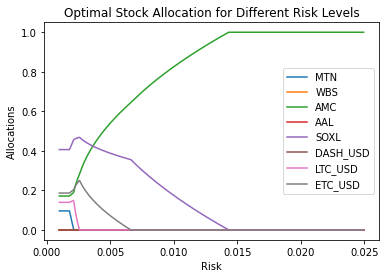

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = [ 'MTN', 'WBS', 'AMC', 'AAL', 'SOXL', 'DASH_USD', 'LTC_USD', 'ETC_USD']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
xlabel('Risk')
ylabel('Allocations')
plt.show()

**Efficient Frontliner:** comprises investment portfolios that offer the highest expected return for a specific level of risk.

The graph above shows the optimal allocation of stocks at each risk level (x-axis)

On the lefthand side, we have low risk and high diversity.

On the righthand side, we have high risk and low diversity. Our effecient frontliner is the AMC stock.

Next we will take a look at risk (X) vs. return (Y) of the efficient frontliner.

In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.001, 0.00105, 0.0010999999999999998, 0.0011499999999999998, 0.0011999999999999997, 0.0012499999999999996, 0.0012999999999999995, 0.0013499999999999994, 0.0013999999999999993, 0.0014499999999999992, 0.0014999999999999992, 0.001549999999999999, 0.001599999999999999, 0.001649999999999999, 0.0016999999999999988, 0.0017499999999999987, 0.0017999999999999986, 0.0018499999999999986, 0.0018999999999999985, 0.0019499999999999984, 0.0019999999999999983, 0.002049999999999998, 0.002099999999999998, 0.0021499999999999983, 0.002199999999999998, 0.0022499999999999977, 0.002299999999999998, 0.002349999999999998, 0.0023999999999999976, 0.0024499999999999973, 0.0024999999999999974, 0.0025499999999999976, 0.0025999999999999973, 0.002649999999999997, 0.002699999999999997, 0.0027499999999999972, 0.002799999999999997, 0.0028499999999999966, 0.0028999999999999968, 0.002949999999999997, 0.0029999999999999966, 0.0030499999999999963, 0.0030999999999999964, 0.0031499999999999966, 0.0031999999999999963, 0.0032

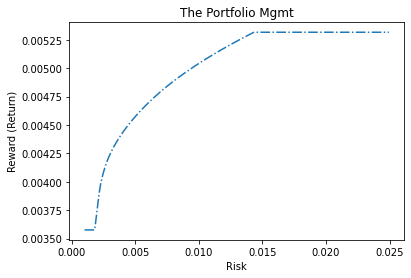

In [ ]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('The Portfolio Mgmt')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

With the efficient frontliner, we can see that at a certain point, taking on more risk doesn't increase our returns. This occurs at ~Risk = 0.015 which achieves a max return around 0.53%.

# 3- Monte Carlo Simulation

In this section, we will run a Monte Carlo Simulation on the portfolio you selected in the previous items to compute the probability with which your portfolio will lose money.

> Simulation was restricted to a single trading day and took the correlations between the assets into account. 



### **Chosing Our Risk Level and Assets**
#####Let's take a look at this plot again. In this project, we are focusing on low risk and high return. We need to find the risk level where at least 4 stocks are non-zero values. From there we need to find the risk level where the probability percentage of losing money in this portfolio. This occurs at **0.0023999999999999976**. The probability of losing money in this portofolio at that risk level is **47.32 %**

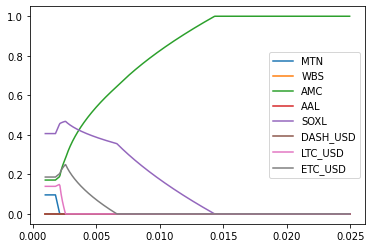

In [ ]:
param_analysis.plot()
plt.show()

In [ ]:
#Return of stocks at our risk level. 
param_analysis.loc[0.0023999999999999976] # index 2,4,6,7 used below to calculate proportions

MTN         0.000000
WBS         0.000000
AMC         0.250810
AAL         0.000000
SOXL        0.464793
DASH_USD    0.000000
LTC_USD     0.048851
ETC_USD     0.235547
Name: 0.0023999999999999976, dtype: float64

We can see that at index 2,4,6,7 in the array above we are getting a non zero allocation. This is the proportion of the stocks and the cryptocurrencies which will be considered in the portfolio which consisted of AMC, SOXL, LTC-USD, ETC-USD.

In [ ]:
df_cov

,MTN,WBS,AMC,AAL,SOXL,DASH-USD,LTC-USD,ETC-USD
MTN,0.000509,0.000292,0.000234,0.000328,0.000527,0.000141,0.000146,0.000142
WBS,0.000292,0.000857,0.000430,0.000629,0.000864,0.000168,0.000243,0.000229
AMC,0.000234,0.000430,0.014327,0.001021,0.000457,0.000160,0.000004,0.000063
AAL,0.000328,0.000629,0.001021,0.001537,0.000902,0.000092,0.000140,0.000154
SOXL,0.000527,0.000864,0.000457,0.000902,0.003736,0.000610,0.000730,0.000764
DASH-USD,0.000141,0.000168,0.000160,0.000092,0.000610,0.005262,0.003194,0.003511
LTC-USD,0.000146,0.000243,0.000004,0.000140,0.000730,0.003194,0.004710,0.003133
ETC-USD,0.000142,0.000229,0.000063,0.000154,0.000764,0.003511,0.003133,0.005294


In [ ]:
# for the following list of ["AMC","SOXL","LTC-USD","ETC-USD"], we must subset the co-variance matrix
df_cov_ss=df_cov.loc[["AMC","SOXL","LTC-USD","ETC-USD"],["AMC","SOXL","LTC-USD","ETC-USD"]]

In [ ]:
df_cov_ss.head()

,AMC,SOXL,LTC-USD,ETC-USD
AMC,0.014327,0.000457,0.000004,0.000063
SOXL,0.000457,0.003736,0.000730,0.000764
LTC-USD,0.000004,0.000730,0.004710,0.003133
ETC-USD,0.000063,0.000764,0.003133,0.005294


In [ ]:
#risk_limits is array created above from our model with risk limit options
# Convert the array to a list
risks_1=(risk_limits).tolist()

In [ ]:
#To get the proportions for each stock in the portfolio (This is from the parameter analysis graph above)
a=param_analysis.loc[0.0023999999999999976][2]
s=param_analysis.loc[0.0023999999999999976][4]
l=param_analysis.loc[0.0023999999999999976][6]
e=param_analysis.loc[0.0023999999999999976][7]

In [ ]:
#df_return is a name we declared earlier with the average return for each stock
#Select the chosen stocks and their return, and create a matrix with chosen returns
df_return_ss=df_return.iloc[[2,4,6,7]]

In [ ]:
#mean return of these 4 stocks
df_return_ss

AMC        0.005316
SOXL       0.003748
LTC-USD    0.003070
ETC-USD    0.003484
dtype: float64

In [ ]:
#Use np.random.multivariate_normal to create a list with random samples
asset_list=np.random.multivariate_normal(df_return_ss,df_cov_ss)

In [ ]:
asset_list

array([ 0.04292336,  0.03479498, -0.00322105,  0.05534562])

### **Run Monte Carlo Simulation**
Here we will run a Monte Carlo Simulation using the variables defined above to calculate the probability percentage of losing money in this portfolio

In [ ]:
# run the simulation
simulations=10000
sum_of_returns=list()
#the loss_val is a counter that will increment everytime sum of return*proprotion for 4 chosen stocks is less than 1
# we took the value of return for each of the chosen asset for the simulation
# Using the np multivariate function that it is taken into account the mean of returns and covariance for the assets for computation of the values.
# As an output of this function, we get a list of 4 asset value or return values 
loss_val=0 
for i in range(simulations):
  asset_list=np.random.multivariate_normal(df_return_ss,df_cov_ss)

# the investment value is computed by taking the product of the returns and proportion of assets
# total investment value less than 0 implies loss of money 
  value_asset=(asset_list[0]*a)+(asset_list[1]*s)+(asset_list[2]*l)+(asset_list[3]*e)
  sum_of_returns.append(value_asset)
  if(value_asset<0):
    loss_val+=1
  else:
    continue
loss_p=round((loss_val/simulations)*100,2)
print("The probability percentage of losing money in this portfolio for a risk of 0.0023999999999999976 is:", loss_p,"%")

The probability percentage of losing money in this portfolio for a risk of 0.0023999999999999976 is: 46.48 %


The probability percentage of losing money for our model tends to stay approx 47%

## Density Plot Graph

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


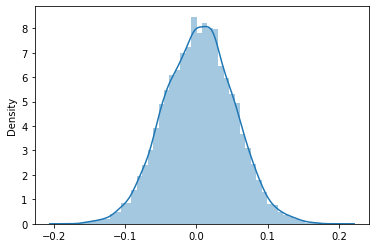

In [ ]:
#density plot graph
import seaborn as sns
sns.distplot(sum_of_returns)

So, we can see that the density plot of the histogram behaves like a normal distribution with mean at 0 and standard deviation as 0.15. It is also not skewed.

# 4 - Portfolio and Model Analysis

## 1st part

##### In this section we will analyze our portfolio's prices and return for the 2021 calendar year, against the S&P 500 and Dow Jones Index. First we will scrap the prices of our stocks from Yahoo Finance and put it into a dataframe. This time we are colleting monthly data (on the 1st of every month) from Jan.-Dec. 2021

In [ ]:
#Scrapping monthly Stock data from Yahoo Finance from Jan 1 2021 to Dec 1 2021

# Assign the ticker list that we want to scrap
#Stocks selected are 'AMC','SOXL','LTC-USD','ETC-USD'
tickers_list = ['AMC','SOXL','LTC-USD','ETC-USD']
# pull historical price data for each stocks to match with our news score later
sp_prices = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='01/01/2022',interval='1mo') for ticker in tickers_list}

In [ ]:
#see results
sp_prices

{'AMC':                  open       high        low      close   adjclose      volume  \
 2021-01-01   2.200000  20.360001   1.910000  13.260000  13.260000  4619260500   
 2021-02-01  17.000000  17.250000   5.260000   8.010000   8.010000  3633853400   
 2021-03-01   8.860000  14.540000   7.500000  10.210000  10.210000  2473590700   
 2021-04-01  10.230000  12.220000   8.310000  10.030000  10.030000   937749200   
 2021-05-01  10.110000  36.720001   8.930000  26.120001  26.120001  3429068000   
 2021-06-01  31.889999  72.620003  28.530001  56.680000  56.680000  5520090100   
 2021-07-01  56.860001  57.709999  31.150000  37.020000  37.020000  2078262700   
 2021-08-01  37.580002  48.299999  28.910000  47.130001  47.130001  2029688700   
 2021-09-01  47.160000  52.790001  33.740002  38.060001  38.060001  1400005900   
 2021-10-01  39.410000  44.439999  34.529999  35.369999  35.369999   812160400   
 2021-11-01  35.650002  45.950001  32.750000  33.939999  33.939999   731269900   
 2021-12-

In [ ]:
#Extract just the data we need
sp_prep = pd.DataFrame(sp_prices['AMC']['adjclose']).rename(columns = {"adjclose":"AMC"})

# Combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  sp_prep[i] = pd.DataFrame(sp_prices[i]['adjclose'])
# Display the results
sp_prep

,AMC,SOXL,LTC-USD,ETC-USD
2021-01-01,13.260000,33.372108,129.570816,7.412038
2021-02-01,8.010000,38.677574,164.927170,10.312784
2021-03-01,10.210000,38.177334,197.499100,14.079754
2021-04-01,10.030000,36.884403,271.167084,36.368431
2021-05-01,26.120001,38.763607,188.033676,70.218208
2021-06-01,56.680000,44.521175,144.135834,57.627308
2021-07-01,37.020000,44.371235,144.933212,51.415771
2021-08-01,47.130001,46.530327,171.659225,63.928410
2021-09-01,38.060001,40.023079,153.147995,46.976051
2021-10-01,35.369999,47.629864,191.816376,54.325451


Next we calculate the return every month for each stock. We calculate this using again the percent change in price for the specified months

In [ ]:
# Create return features for each ticker, 
# We will just use a pct_change as the return
return_sp = pd.DataFrame()
for i in tickers_list:
  return_sp[i] = sp_prep[i].pct_change()
# drop the na records
return_sp.dropna(inplace=True)
return_sp

,AMC,SOXL,LTC-USD,ETC-USD
2021-02-01,-0.395928,0.158979,0.272873,0.391356
2021-03-01,0.274657,-0.012934,0.197493,0.365272
2021-04-01,-0.017630,-0.033866,0.373004,1.583030
2021-05-01,1.604188,0.050948,-0.306576,0.930746
2021-06-01,1.169985,0.148530,-0.233457,-0.179311
2021-07-01,-0.346860,-0.003368,0.005532,-0.107788
2021-08-01,0.273096,0.048660,0.184402,0.243362
2021-09-01,-0.192446,-0.139850,-0.107837,-0.265177
2021-10-01,-0.070678,0.190060,0.252490,0.156450
2021-11-01,-0.040430,0.357188,0.084446,-0.109521


In [ ]:
#Drop index to avoid issues while running model
return_sp.reset_index(drop=True, inplace=True)
return_sp

,AMC,SOXL,LTC-USD,ETC-USD
0,-0.395928,0.158979,0.272873,0.391356
1,0.274657,-0.012934,0.197493,0.365272
2,-0.017630,-0.033866,0.373004,1.583030
3,1.604188,0.050948,-0.306576,0.930746
4,1.169985,0.148530,-0.233457,-0.179311
5,-0.346860,-0.003368,0.005532,-0.107788
6,0.273096,0.048660,0.184402,0.243362
7,-0.192446,-0.139850,-0.107837,-0.265177
8,-0.070678,0.190060,0.252490,0.156450
9,-0.040430,0.357188,0.084446,-0.109521


Create a covariance matrix with the average returns from the stocks in our portfolio

In [ ]:
# creating covariance table on stock return dataframe
sp_cov = return_sp.cov()
print('Covariance Matrix:')
print(sp_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
sp_return = return_sp.mean()
print('Average Return:')
print(sp_return)

Covariance Matrix:
              AMC      SOXL   LTC-USD   ETC-USD
AMC      0.406724  0.004008 -0.079856  0.089945
SOXL     0.004008  0.017902  0.003316 -0.015196
LTC-USD -0.079856  0.003316  0.058849  0.061087
ETC-USD  0.089945 -0.015196  0.061087  0.328590


Average Return:
AMC        0.187215
SOXL       0.074181
LTC-USD    0.038793
ETC-USD    0.246711
dtype: float64


In the next part, we scrape the price values from S&P 500 and the Dow Jones Index from Jan 2021-Dec. and add it to their own data frames to see the prices during this time.

In [ ]:
# The S&P 500 values were extracted through the ticketer's list
tickers_list_SP = ['^GSPC']
# pull historical price data for S&P 500

dow_prices_SP = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='01/01/2022',interval='1mo') for ticker in tickers_list_SP}
prep_data_SP = pd.DataFrame(dow_prices_SP['^GSPC']['adjclose']).rename(columns = {"adjclose":"^GSPC"})
prep_data_SP

,^GSPC
2021-01-01,3714.239990
2021-02-01,3811.149902
2021-03-01,3972.889893
2021-04-01,4181.169922
2021-05-01,4204.109863
2021-06-01,4297.500000
2021-07-01,4395.259766
2021-08-01,4522.680176
2021-09-01,4307.540039
2021-10-01,4605.379883


In [ ]:
tickers_list_DJI = ['^DJI']
# pull historical price data for DowJones
dow_prices_DJI = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='01/01/2022',interval='1mo') for ticker in tickers_list_DJI}
prep_data_DJI = pd.DataFrame(dow_prices_DJI['^DJI']['adjclose']).rename(columns = {"adjclose":"^DJI"})
prep_data_DJI

,^DJI
2021-01-01,29982.619141
2021-02-01,30932.369141
2021-03-01,32981.550781
2021-04-01,33874.851562
2021-05-01,34529.449219
2021-06-01,34502.511719
2021-07-01,34935.468750
2021-08-01,35360.730469
2021-09-01,33843.921875
2021-10-01,35819.558594


Finally, we create a dataframe with price data for all for of our stocks along with the price data for the S&P 500 and Dow Jones Index. 

**Note:** This time we scrap data till 1/1/2022 so that the first month doesn't get cut off in the return calculation

In [ ]:
#Scrapping monthly Stock data from Yahoo Finance from Jan 1 2021 to Dec 1 2022

# Assign the ticker list that we want to scrap
tickers_list = ['AMC','SOXL','LTC-USD','ETC-USD','^GSPC','^DJI']
# pull historical price data for each stocks to match with our news score later
sp_prices = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='01/01/2022',interval='1mo') for ticker in tickers_list}

In [ ]:
sp_prep = pd.DataFrame(sp_prices['AMC']['adjclose']).rename(columns = {"adjclose":"AMC"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  sp_prep[i] = pd.DataFrame(sp_prices[i]['adjclose'])
#Display the results
sp_prep

,AMC,SOXL,LTC-USD,ETC-USD,^GSPC,^DJI
2021-01-01,13.260000,33.372112,129.570816,7.412038,3714.239990,29982.619141
2021-02-01,8.010000,38.677574,164.927170,10.312784,3811.149902,30932.369141
2021-03-01,10.210000,38.177338,197.499100,14.079754,3972.889893,32981.550781
2021-04-01,10.030000,36.884403,271.167084,36.368431,4181.169922,33874.851562
2021-05-01,26.120001,38.763607,188.033676,70.218208,4204.109863,34529.449219
2021-06-01,56.680000,44.521175,144.135834,57.627308,4297.500000,34502.511719
2021-07-01,37.020000,44.371235,144.933212,51.415771,4395.259766,34935.468750
2021-08-01,47.130001,46.530327,171.659225,63.928410,4522.680176,35360.730469
2021-09-01,38.060001,40.023079,153.147995,46.976051,4307.540039,33843.921875
2021-10-01,35.369999,47.629864,191.816376,54.325451,4605.379883,35819.558594


Next we will begin calculating our return for each index and our portfolio. We start by applying the proportions we specified in step 3, for each asset. Here we create new columns with a calculation of the price * specified portfolio proportion and drop the old price columns.


We also create column called "Our Portfolio" that sums the prices of each of our stock, for each month.

In [ ]:
#ddd the value returns for the chose proportion of assets .
# a,s,l,e are the proporiton of assets for the chosen portfolio
sp_prep["AMC_a"]=sp_prep["AMC"]*a
sp_prep["SOXL_s"]=sp_prep["SOXL"]*s
sp_prep["LTC-USD_l"]=sp_prep["LTC-USD"]*l
sp_prep["ETC-USD_e"]=sp_prep["ETC-USD"]*e

In [ ]:
sp_prep.drop(["AMC","SOXL","LTC-USD","ETC-USD"],axis=1,inplace=True)

In [ ]:
sp_prep.rename(columns = {"AMC_a":"AMC","SOXL_s":"SOXL","LTC-USD_l":"LTC-USD","ETC-USD_e":"ETC-USD"},inplace=True)

In [ ]:
sp_prep['Our Portfolio'] = sp_prep['AMC'] + sp_prep['SOXL'] + sp_prep['LTC-USD'] + sp_prep['ETC-USD']

In [ ]:
sp_prep

,^GSPC,^DJI,AMC,SOXL,LTC-USD,ETC-USD,Our Portfolio
2021-01-01,3714.239990,29982.619141,3.325738,15.511112,6.329613,1.745883,26.912346
2021-02-01,3811.149902,30932.369141,2.008986,17.977051,8.056793,2.429146,30.471976
2021-03-01,3972.889893,32981.550781,2.560768,17.744545,9.647951,3.316444,33.269708
2021-04-01,4181.169922,33874.851562,2.515622,17.143599,13.246677,8.566475,41.472374
2021-05-01,4204.109863,34529.449219,6.551152,18.017039,9.185560,16.539690,50.293440
2021-06-01,4297.500000,34502.511719,14.215898,20.693114,7.041123,13.573941,55.524076
2021-07-01,4395.259766,34935.468750,9.284978,20.623423,7.080076,12.110832,49.099308
2021-08-01,4522.680176,35360.730469,11.820665,21.626953,8.385658,15.058146,56.891422
2021-09-01,4307.540039,33843.921875,9.545820,18.602432,7.481373,11.065069,46.694694
2021-10-01,4605.379883,35819.558594,8.871142,22.138010,9.370347,12.796198,53.175696


Next, we calculate the return (percent change) for all of our individual stocks, our portfolio, and the 2 indexes.

In [ ]:
tickers_list = ['AMC','SOXL','LTC-USD','ETC-USD','^GSPC','^DJI','Our Portfolio']

In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_sp = pd.DataFrame()
for i in tickers_list:
  return_sp[i] = sp_prep[i].pct_change()
# drop the na records
return_sp.dropna(inplace=True)
return_sp

,AMC,SOXL,LTC-USD,ETC-USD,^GSPC,^DJI,Our Portfolio
2021-02-01,-0.395928,0.158979,0.272873,0.391356,0.026091,0.031677,0.132268
2021-03-01,0.274657,-0.012934,0.197493,0.365272,0.042439,0.066247,0.091813
2021-04-01,-0.017630,-0.033867,0.373004,1.583030,0.052425,0.027085,0.246551
2021-05-01,1.604188,0.050948,-0.306576,0.930746,0.005486,0.019324,0.212697
2021-06-01,1.169985,0.148530,-0.233457,-0.179311,0.022214,-0.000780,0.104002
2021-07-01,-0.346860,-0.003368,0.005532,-0.107788,0.022748,0.012549,-0.115711
2021-08-01,0.273096,0.048660,0.184402,0.243362,0.028990,0.012173,0.158701
2021-09-01,-0.192446,-0.139850,-0.107837,-0.265177,-0.047569,-0.042895,-0.179231
2021-10-01,-0.070678,0.190060,0.252490,0.156450,0.069144,0.058375,0.138795
2021-11-01,-0.040430,0.357188,0.084446,-0.109521,-0.008334,-0.037294,0.130485


In [ ]:
#drop index to avoid issues while running model
return_sp.reset_index(drop=True, inplace=True)
return_sp

,AMC,SOXL,LTC-USD,ETC-USD,^GSPC,^DJI,Our Portfolio
0,-0.395928,0.158979,0.272873,0.391356,0.026091,0.031677,0.132268
1,0.274657,-0.012934,0.197493,0.365272,0.042439,0.066247,0.091813
2,-0.017630,-0.033867,0.373004,1.583030,0.052425,0.027085,0.246551
3,1.604188,0.050948,-0.306576,0.930746,0.005486,0.019324,0.212697
4,1.169985,0.148530,-0.233457,-0.179311,0.022214,-0.000780,0.104002
5,-0.346860,-0.003368,0.005532,-0.107788,0.022748,0.012549,-0.115711
6,0.273096,0.048660,0.184402,0.243362,0.028990,0.012173,0.158701
7,-0.192446,-0.139850,-0.107837,-0.265177,-0.047569,-0.042895,-0.179231
8,-0.070678,0.190060,0.252490,0.156450,0.069144,0.058375,0.138795
9,-0.040430,0.357188,0.084446,-0.109521,-0.008334,-0.037294,0.130485


Here is a summary of our results. Below we have summed the percent changes per month our portfolio as well as the S&P 500 and Dow Jones Index. As you can see our portfolio does fairly well, with an 80% return as compared to 20% and 25% return for Dow Jones and S&P 500.

In [ ]:
# create the performance report for the returns value
assets_returns_1=return_sp["Our Portfolio"].sum()
sp_ret=return_sp["^GSPC"].sum()
dj_ret=return_sp["^DJI"].sum()
performance_report = pd.DataFrame({'Returns':[sp_ret,dj_ret,assets_returns_1]}, index=["S&P 500","Dow Jones","Portfolio Chosen" ])
performance_report

,Returns
S&P 500,0.257248
Dow Jones,0.200241
Portfolio Chosen,0.812245


![picture](https://i.gifer.com/origin/11/1184b4c0aa977f925dde58d2075772dd_w200.webp)

## 2nd part

In this section we redo step 2 with the added constraint that at least one stock and one cryptocurrency must receive at least 10% of the allocated budget.

In [ ]:
# creating covariance table on stock return dataframe
sp_cov = return_sp.cov()
# Printing the covariance matrix
print('Covariance Matrix:')
print(sp_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
sp_return = return_sp.mean()
# Printing the average return
print('Average Return:')
print(sp_return)

Covariance Matrix:
                    AMC      SOXL   LTC-USD   ETC-USD     ^GSPC      ^DJI  \
AMC            0.406724  0.004008 -0.079856  0.089945 -0.001700 -0.000830   
SOXL           0.004008  0.017902  0.003316 -0.015196  0.000672 -0.000362   
LTC-USD       -0.079856  0.003316  0.058849  0.061087  0.003267  0.002095   
ETC-USD        0.089945 -0.015196  0.061087  0.328590  0.006246  0.005855   
^GSPC         -0.001700  0.000672  0.003267  0.006246  0.001011  0.000984   
^DJI          -0.000830 -0.000362  0.002095  0.005855  0.000984  0.001269   
Our Portfolio  0.040368  0.007810  0.015118  0.059243  0.001904  0.001178   

               Our Portfolio  
AMC                 0.040368  
SOXL                0.007810  
LTC-USD             0.015118  
ETC-USD             0.059243  
^GSPC               0.001904  
^DJI                0.001178  
Our Portfolio       0.020147  


Average Return:
AMC              0.187215
SOXL             0.074181
LTC-USD          0.038793
ETC-USD          0.2

Here we again define our variables with bounds of 0 and 1, then define binary variables for every stock. If the value is 0, then the stock does not receive 10% of the budget. If the value is 1, it does receive at least 10%

In [ ]:
# Optimization model with atleast 2 stocks receiving atleast 10% of budget each
from pyomo.environ import *
budget = 1

# Defining the model
m = ConcreteModel()

# defining the different stocks as variables
m.MTN = Var(within=NonNegativeReals, bounds=(0,1))
m.WBS = Var(within=NonNegativeReals, bounds=(0,1))
m.AMC = Var(within=NonNegativeReals, bounds=(0,1))
m.AAL = Var(within=NonNegativeReals, bounds=(0,1))
m.SOXL = Var(within=NonNegativeReals, bounds=(0,1))
m.DASH_USD = Var(within=NonNegativeReals, bounds=(0,1))
m.LTC_USD = Var(within=NonNegativeReals, bounds=(0,1))
m.ETC_USD = Var(within=NonNegativeReals, bounds=(0,1))

# Defining the binary variables for every stock. 
# If the value is 0, then the stock doesnot receive  atleast 10% of budget
# If the value is 1, then the stock receives  atleast 10% of budget
m.A1 = Var(domain=Binary) # Binary Variable for MTN
m.A2 = Var(domain=Binary) # Binary Variable for WBS
m.A3 = Var(domain=Binary) # Binary Variable for AMC
m.A4 = Var(domain=Binary) # Binary Variable for AAL
m.A5 = Var(domain=Binary) # Binary Variable for SOXL
m.A6 = Var(domain=Binary) # Binary Variable for DASH_USD
m.A7 = Var(domain=Binary) # Binary Variable for LTC_USD
m.A8 = Var(domain=Binary) # Binary Variable for m.ETC_USD

Here we create the constraint for having at least one stock and one cryptocurrency having more than 10% of the budget by multiplying by 0.1 when the variblae is equal to 1.

In [ ]:
# Objective Function Max(Z) = MTN * A1 + WBS* A2 + AMC * A3 + AAL * A4 + SOXL * A5 + DASH_USD * A6 + LTC_USD * A7 + ETC_USD * A8
m.objective = Objective(expr =               
                        m.MTN*df_return[0] + 
                        m.WBS*df_return[1] + 
                        m.AMC*df_return[2] +
                        m.AAL*df_return[3] + 
                        m.SOXL* df_return[4]+
                        m.DASH_USD*df_return[5] + 
                        m.LTC_USD*df_return[6] + 
                        m.ETC_USD*df_return[7], 
                        sense=maximize) # yes, we want to MAX our returns!

# declare constraints
# 1. Sum of all proportions = 1
m.sum_proportions = Constraint(expr = m.MTN+m.WBS+m.AMC+m.AAL+m.SOXL+m.DASH_USD+m.LTC_USD+m.ETC_USD == 1)


# 2. At least one stock and one cryptocurrency should have more than 10% of the budget
m.Constraint1 = Constraint(expr = m.A1+m.A2+m.A3+m.A4+m.A5+m.A6+m.A7+m.A8>=2)

#3 Since atleast two stocks should have alteast 10 % budget, we add the constraint to every stock 
# MTN >= 0.1*A1
m.Constraint2 = Constraint(expr =m.MTN>=0.1*m.A1)
# WBS >= 0.1*A2
m.Constraint3 = Constraint(expr =m.WBS>=0.1*m.A2)
# AMC >= 0.1*A3
m.Constraint4 = Constraint(expr =m.AMC>=0.1*m.A3)
# AAL >= 0.1*A4
m.Constraint5 = Constraint(expr =m.AAL>=0.1*m.A4)
# SOXL >= 0.1*A5
m.Constraint6 = Constraint(expr =m.SOXL>=0.1*m.A5)
# DASH_USD >= 0.1*A6
m.Constraint7 = Constraint(expr =m.DASH_USD>=0.1*m.A6)
# LTC_USD >= 0.1*A7
m.Constraint8 = Constraint(expr =m.LTC_USD>=0.1*m.A7)
# ETC_USD>= 0.1*A8
m.Constraint9 = Constraint(expr =m.ETC_USD>=0.1*m.A8)

# 3. Minimum return should be 0.015 or 1.5%
m.return_floor = Constraint(expr = m.objective >= 0.015)


In [ ]:
# creating calculations table for calculate the risk
# 3. Max risk should be less than 0.025
max_risk = 0.025
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  # this is UPDATED as the model is cranking - see how we are referncing the decision variables?
  proportions = [ m.MTN, m.WBS, m.AMC, m.AAL, m.SOXL , m.DASH_USD , m.LTC_USD , m.ETC_USD]
  risk_matrix = [] # an empty list
  
  # now we iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 5 stocks, there are 5*5 = 25 elements
  # sum these 25 elements up at the end! that's the risk.
  for index, col in enumerate(df_cov.columns):
    i = 0
    risk = []
    for row in df_cov[col]:
      risk.append(proportions[index]*row*proportions[i])
      i = i + 1
      print('index:',risk)
      
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum() 
  
# # defining risk limits. 

# # this is a sequence of options - better!
risk_limits = np.arange(0.001, 0.025, 0.00005) # take tiny steps
risk_limits

array([0.001  , 0.00105, 0.0011 , 0.00115, 0.0012 , 0.00125, 0.0013 ,
       0.00135, 0.0014 , 0.00145, 0.0015 , 0.00155, 0.0016 , 0.00165,
       0.0017 , 0.00175, 0.0018 , 0.00185, 0.0019 , 0.00195, 0.002  ,
       0.00205, 0.0021 , 0.00215, 0.0022 , 0.00225, 0.0023 , 0.00235,
       0.0024 , 0.00245, 0.0025 , 0.00255, 0.0026 , 0.00265, 0.0027 ,
       0.00275, 0.0028 , 0.00285, 0.0029 , 0.00295, 0.003  , 0.00305,
       0.0031 , 0.00315, 0.0032 , 0.00325, 0.0033 , 0.00335, 0.0034 ,
       0.00345, 0.0035 , 0.00355, 0.0036 , 0.00365, 0.0037 , 0.00375,
       0.0038 , 0.00385, 0.0039 , 0.00395, 0.004  , 0.00405, 0.0041 ,
       0.00415, 0.0042 , 0.00425, 0.0043 , 0.00435, 0.0044 , 0.00445,
       0.0045 , 0.00455, 0.0046 , 0.00465, 0.0047 , 0.00475, 0.0048 ,
       0.00485, 0.0049 , 0.00495, 0.005  , 0.00505, 0.0051 , 0.00515,
       0.0052 , 0.00525, 0.0053 , 0.00535, 0.0054 , 0.00545, 0.0055 ,
       0.00555, 0.0056 , 0.00565, 0.0057 , 0.00575, 0.0058 , 0.00585,
       0.0059 , 0.00

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  m.total_risk = Constraint(expr = calc_risk() <= r)
  
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [m.MTN(), m.WBS(), m.AMC(), m.AAL(), m.SOXL() , m.DASH_USD() , m.LTC_USD() , m.ETC_USD()]
  # store our returns
  returns[r] =  m.MTN()*df_return[0] + m.WBS()*df_return[1] + m.AMC()*df_return[2] + m.AAL()*df_return[3] + m.SOXL()*df_return[4] + m.DASH_USD()*df_return[5] + m.LTC_USD()*df_return[6] + m.ETC_USD()*df_return[7]

Streaming output truncated to the last 5000 lines.
  Error rc: 0
  Time: 0.17055773735046387
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
index: [<pyomo.core.expr.numeric_expr.ProductExpression object at 0x7f68caf483d0>]
index: [<pyomo.core.expr.numeric_expr.ProductExpression object at 0x7f68caf483d0>, <pyomo.core.expr.numeric_expr.ProductExpression object at 0x7f68ca4b64d0>]
index: [<pyomo.core.expr.numeric_expr.ProductExpression object at 0x7f68caf483d0>, <pyomo.core.expr.numeric_expr.ProductExpression object at 0x7f68ca4b64d0>, <pyomo.core.expr.numeric_expr.ProductExpression object at 0x7f68ca59b550>]
index: [<pyomo.core.expr.numeric_expr.ProductExpression object at 0x7f68caf483d0>, <pyomo.core.expr.numeric_expr.ProductExpression object at 0x7f68ca4b64d0>, <pyomo.core.expr.numeric_expr.ProductExpression object at

In [ ]:
print('8 stocks', m.MTN(), m.WBS(), m.AMC(), m.AAL(), m.SOXL() , m.DASH_USD() , m.LTC_USD() , m.ETC_USD())


8 stocks 0.0 0.0 0.9000000622520242 0.0 0.09999995647797372 0.0 0.0 1.5979350084913673e-08


In [ ]:
print('return:', returns)

return: {0.001: 0.0035761297222465793, 0.00105: 0.00357612745153648, 0.0010999999999999998: 0.0035761274222096116, 0.0011499999999999998: 0.0035761274024080003, 0.0011999999999999997: 0.003576127384376327, 0.0012499999999999996: 0.0035761273664091796, 0.0012999999999999995: 0.0035761273485078603, 0.0013499999999999994: 0.003576127330694937, 0.0013999999999999993: 0.0035761273129797334, 0.0014499999999999992: 0.0035761272954305994, 0.0014999999999999992: 0.0035761272781935343, 0.001549999999999999: 0.0035761272587611697, 0.001599999999999999: 0.003576127244936605, 0.001649999999999999: 0.0035761272314928823, 0.0016999999999999988: 0.0035761272205304413, 0.0017499999999999987: 0.0035761272228955164, 0.0017999999999999986: 0.003576137101868772, 0.0018499999999999986: 0.003620066170037465, 0.0018999999999999985: 0.0036688178023902523, 0.0019499999999999984: 0.0037167234551792007, 0.0019999999999999983: 0.00376382562071017, 0.002049999999999998: 0.00381016341854644, 0.002099999999999998: 0.

### Parameter Analysis

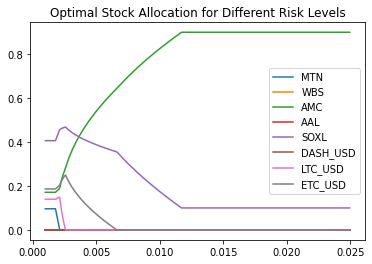

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = [ 'MTN', 'WBS', 'AMC', 'AAL', 'SOXL', 'DASH_USD', 'LTC_USD', 'ETC_USD']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.001, 0.00105, 0.0010999999999999998, 0.0011499999999999998, 0.0011999999999999997, 0.0012499999999999996, 0.0012999999999999995, 0.0013499999999999994, 0.0013999999999999993, 0.0014499999999999992, 0.0014999999999999992, 0.001549999999999999, 0.001599999999999999, 0.001649999999999999, 0.0016999999999999988, 0.0017499999999999987, 0.0017999999999999986, 0.0018499999999999986, 0.0018999999999999985, 0.0019499999999999984, 0.0019999999999999983, 0.002049999999999998, 0.002099999999999998, 0.0021499999999999983, 0.002199999999999998, 0.0022499999999999977, 0.002299999999999998, 0.002349999999999998, 0.0023999999999999976, 0.0024499999999999973, 0.0024999999999999974, 0.0025499999999999976, 0.0025999999999999973, 0.002649999999999997, 0.002699999999999997, 0.0027499999999999972, 0.002799999999999997, 0.0028499999999999966, 0.0028999999999999968, 0.002949999999999997, 0.0029999999999999966, 0.0030499999999999963, 0.0030999999999999964, 0.0031499999999999966, 0.0031999999999999963, 0.0032

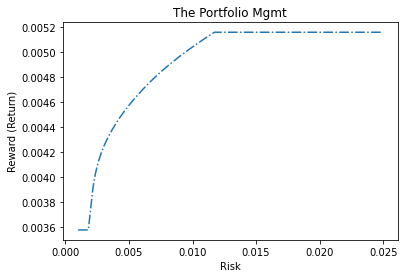

In [ ]:
# plot!
from pylab import *
plot(risk, reward, '-.')
title('The Portfolio Mgmt')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

In [ ]:
#  Display the profit
print("Returns = ", m.objective())
# Display the proportion of the stock if it is activated or not. 
# If activation = 0, then the stock is not activated
# If activation  = 1, then the stock is activated
# Proportion and activation of MTN
print("Proportion of Stock MTN = ", m.MTN(), ", activation = ",m.A1())
# Proportion and activation of WBS
print("Proportion of Stock WBS = ", m.WBS(), ", activation = ",m.A2())
# Proportion and activation of AMC
print("Proportion of Stock AMC = ", m.AMC(), ", activation = ",m.A3())
# Proportion and activation of AAL
print("Proportion of Stock AAL = ", m.AAL(), ", activation = ",m.A4())
# Proportion and activation of SOXL
print("Proportion of Cryptocurrency SOXL = ", m.SOXL(), ", activation = ",m.A5())
# Proportion and activation of DASH-USD
print("Proportion of Cryptocurrency DASH-USD = ", m.DASH_USD(), ", activation = ",m.A6())
# Proportion and activation of LTC-USD
print("Proportion of Cryptocurrency LTC-USD = ", m.LTC_USD(), ", activation = ",m.A7())
# Proportion and activation of ETC-USD
print("Proportion of Cryptocurrency ETC-USD = ", m.ETC_USD(), ", activation = ",m.A8())


Returns =  0.005159093910111271
Proportion of Stock MTN =  0.0 , activation =  7.596803590965448e-09
Proportion of Stock WBS =  0.0 , activation =  7.429504680171522e-09
Proportion of Stock AMC =  0.9000000622520242 , activation =  0.9999999946830287
Proportion of Stock AAL =  0.0 , activation =  4.627829455694678e-09
Proportion of Cryptocurrency SOXL =  0.09999995647797372 , activation =  0.9999996487970201
Proportion of Cryptocurrency DASH-USD =  0.0 , activation =  1.5951593415474186e-08
Proportion of Cryptocurrency LTC-USD =  0.0 , activation =  7.088803230877533e-08
Proportion of Cryptocurrency ETC-USD =  1.5979350084913673e-08 , activation =  2.4534377766902843e-07


So, we can see that the plateau in this setting has one stock and one cryptocurrency unlike the previous one in part 2. It is because we have set a constraint that at least one stock and one cryptocurrency each have to have at least 10% allocation. So we can see that the proportion of Cryptocurrency SOXL is 0.9999 which is just 10% and proportion of Stock AMC is 0.9000000622520262. In the previous model, as we didnt have this constraint, everything was allocated toward one stock which meant higher risk for the investor. Now with this constriant, there 10% allocation in 2 assets. So at the highest risk, 1 asset is just meeting the basic need of 10% and the other 90% is allocated for the other.

![picture](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRU_UJwfpSVVZpfnkT-DOPof3NUAV8TC2r45w&usqp=CAU)

# Conclusion


Overall with this project, we were able to elicit great business value in analyzing potential investments in stocks. We utilized several different methods to analyze our data and create models to optimize our portfolio. 

**Data Preparation**


Before doing any data anlaysis, we started off this process by selecting 4 stocks and cryptocurrencies within our assigned market cap, that we believed were diverse and rich additions to our portfolio.

We extracted and cleaned the data for these 8 selected stocks from Yahoo Finance. We combined the data into a data frame, removed rows with missing values, and calculated the return

**Exploratory Data Analysis**

In this section we analyzed the time series data of our chosen stocks and cryptocurrencies. We found that while there seemed to be high variance, which indicated volatility, but the mean seemed to be consistent over time, which indicated less risk. Creating the second plot with all of the stocks in one plot helped us visualize this.

**Non Linear Portfolio Optimization**

Objective: Create an optimization model to select optimal portfolio allocations for each stock.

*Covariance and Correlation*

We started this section by creating the covariance and correlation plot of the average return for each stock.We unfortunately didn't see any negative covariances. However we concluded that this was okay- since *all* the stocks were following the same trend, we concluded that we were simply seeing changes based on major market trends and that the individual stocks weren't changing significantly. While we would ideally like stocks in a portfolio to be going in different directions, we also value consistency and don't want to see stocks that are extremely volatile.

*Building the Non-Linear Optimization  model*

Our model had 3 constraints. 

1. Constraint 1: The proportion of each stock that's invested in the portfolio needs to sum to '1' or 100%. 
2. Constraint 2: Our returns need to be greater than 0.015 or 1.5%.
3. Constraint 3: Risk must be below the 'risk ceiling'.

We wrote a for loop to iterate across the covariance matrix determine our risk limits.

We then ran our model and retrieved the return values.

*Parameter Analysis*
In our parameter analysis, our efficient front liner was the AMC stock. However, as our focus was on low risk and high diversity, we focused on any point where all 4 stocks return a non zero value. From there we chose the combination with lowest probability percentage of losing money


**Monte Carlo Simulation**
In this section, we used a Monte Carlo Simulation to calculate the probability percentage of losing money in this portfolio. Our probability percentage seemed to center around 47%

**Portfolio Analysis**
Our portfolio analysis showed that our portfolio did quite well, with an 80% return in 2021 as compared to 20% and 25% return for Dow Jones and S&P 500.

**Model Analysis**
In the last section we redid out optimization model in part 2 with the added constraint that at least 2 stocks needed to have 10% of the portfolio allocation, each. Our model works and we can see AMC (one stock) and one cryptocurrency (ETC) fulfilling the constraint. ETC fills the minimum 10% as specifid by the model, while MTN takes the remaining 90%


### **Team Contributions**

*   Chinomso Eleje - 1 - Data preparation code partly and choosing assets
*   Divya Myneni - 1 - Visualization of time series and choosing assets
*   Rachel Kallely - 2 - Exploratory Data Analysis (second plot + some additional ones that were deleted), 2 - Non linear Portfolio Optimization (first half), 4 - Portfolio and Model Analysis (Part 1),   Conclusion, Organizing/Describing Colab File, Presentation, and choosing assets
*   Madhusree Chowdhury - Worked on the coding of all the sections. 1 - Data Prep and EDA , 2 - Optimization Model, 3 - Simulation Model, 4 - Analysis, and choosing assets









---

![picture](https://c.tenor.com/vjUIN-dn054AAAAM/thank-you-smile.gif)







Thank you very much for a great semester! We all really enjoyed working on this project, and were able to take away really useful skills and learnings from this class. Have a great summer!